# P3: OpenStreetMap Data Case Study. Dubai and Abu-Dhabi.

### 0. Code Resources

##### 0.1. Code Library

In [1]:
library(devtools)

In [2]:
library(markdown)

In [3]:
library(ggplot2)

In [4]:
library(ggthemes)

In [5]:
library(RColorBrewer)

In [25]:
library(dplyr)

In [7]:
# install.packages('osmar')

In [26]:
library(plotly)

In [9]:
library(plotrix)

In [10]:
library(dygraphs)

In [11]:
library(leaflet)

In [27]:
library(highcharter)

In [13]:
library(magrittr)

In [14]:
library(RJSONIO)

In [15]:
library(rbokeh)

In [31]:
library(maps)

In [17]:
# news(package="maps")

In [32]:
library(rworldmap)

In [33]:
library(rworldxtra)

In [34]:
library(GEOmap)

In [35]:
library(maptools)

In [36]:
library(ggmap)

In [37]:
library(R2HTML)

In [38]:
library(osmar)

##### 0.2. Useful links

https://wiki.openstreetmap.org/wiki/OSM_XML

## 1. Map Area

#### 1.1.  The map
I have chosed the map sector of the dynamically developing area in the UAE.

For displaying the area I have used the  package "ggmap" and the coordinates of this area in dubai_abu-dhabi.osm.

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=dubai&zoom=8&size=640x640&scale=2&maptype=terrain&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=dubai&sensor=false


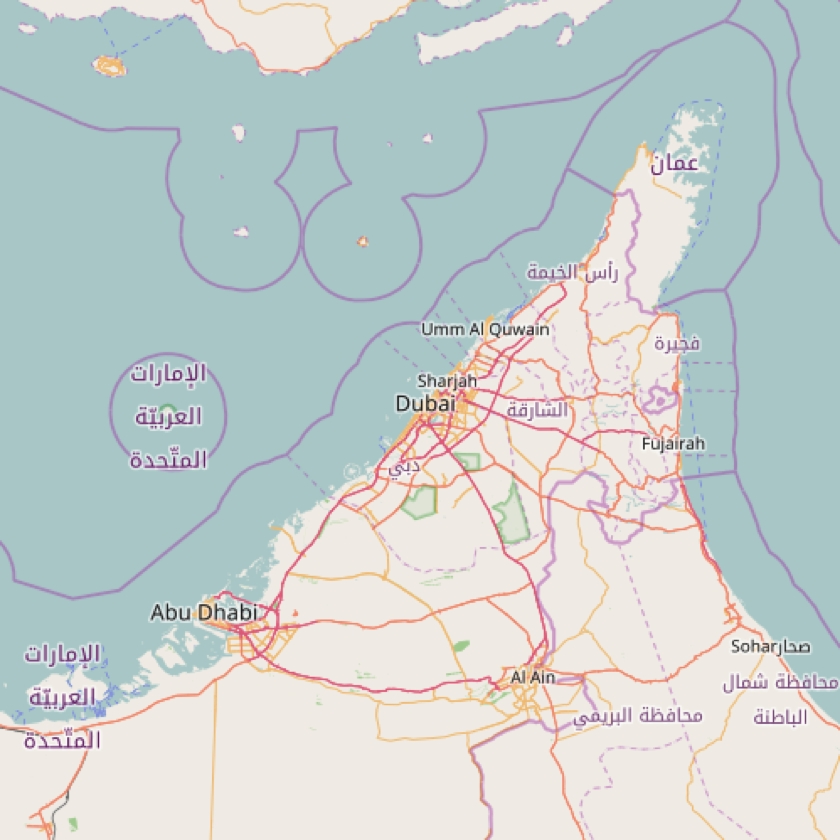

In [39]:
qmap(location = "dubai", zoom = 8, source = "osm")

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=25.2048,55.2708&zoom=8&size=640x640&scale=2&maptype=hybrid&language=en-EN&sensor=false


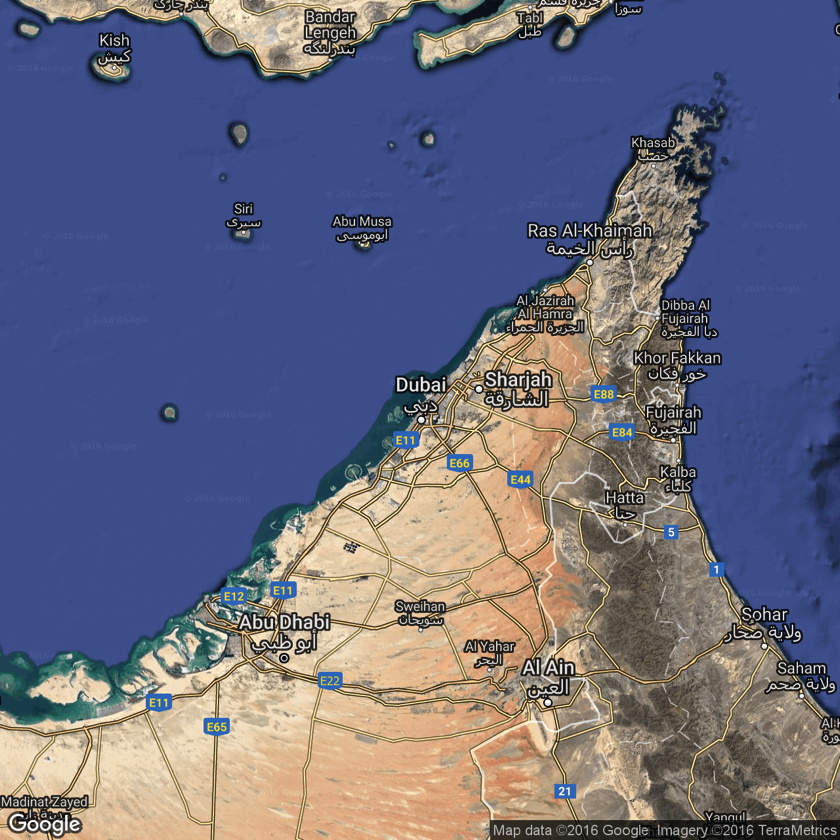

In [40]:
dubai_map <- get_map(location = c(lon = 55.2708, lat = 25.2048),
    color = "color", source = "google", maptype = "hybrid", zoom = 8)
 
ggmap(dubai_map, extent = "device", ylab = "Latitude", xlab = "Longitude")

##### bounds: minlat="23.7350" minlon="53.5800" maxlat="26.5390" maxlon="56.8870"

##### 1.2 Extract with R
There are several ways to extract geodata. One of them is to do this with this R code cell.

This set of commands allows us to upload the data using the coordinates.

In [ ]:
src <- osmsource_api()
box <- center_bbox(55.2708, 25.2048, 3000, 30000)
dubai <- get_osm(box, source = src)

In [99]:
str(dubai)

List of 3
 $ nodes    :List of 2
  ..$ attrs:'data.frame':	51194 obs. of  9 variables:
  .. ..$ id       : num [1:51194] 30593914 30593915 31309234 31309242 31309258 ...
  .. ..$ visible  : Factor w/ 1 level "true": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ timestamp: POSIXlt[1:51194], format: "2016-08-19 09:40:14" "2010-12-14 12:40:14" ...
  .. ..$ version  : num [1:51194] 19 4 3 4 3 2 2 6 6 1 ...
  .. ..$ changeset: num [1:51194] 41552017 6657884 11705710 11705710 6711688 ...
  .. ..$ user     : Factor w/ 230 levels "12Katniss","13 digits",..: 71 195 206 206 195 42 172 195 206 144 ...
  .. ..$ uid      : Factor w/ 230 levels "1004312","1069176",..: 71 3 49 49 3 6 87 3 49 133 ...
  .. ..$ lat      : num [1:51194] 25.2 25.2 25.3 25.3 25.3 ...
  .. ..$ lon      : num [1:51194] 55.3 55.3 55.3 55.3 55.3 ...
  ..$ tags :'data.frame':	2112 obs. of  3 variables:
  .. ..$ id: num [1:2112] 4.17e+09 4.17e+09 2.64e+08 2.64e+08 2.64e+08 ...
  .. ..$ k : Factor w/ 108 levels "access","addr:city",..: 50 102

In [100]:
summary(dubai$nodes)

,lat,lon
min,24.99180,55.09403
max,25.32822,55.37698
Key,Freq.Var1,Freq.Freq
power,A,400
name,B,267
amenity,C,175
source,D,126
name:en,E,124
highway,F,110
shop,G,104


In [101]:
summary(dubai$ways)

Key,Freq.Var1,Freq.Freq
building,A,4598
highway,B,1905
oneway,C,975
name,D,492
source,E,367
maxspeed,F,160
surface,G,158
amenity,H,117
landuse,I,105
leisure,J,81


In [102]:
summary(dubai$relations)

Key,Freq.Var1,Freq.Freq
type,A,99
restriction,B,45
route,C,16
cables,D,11
frequency,E,11
name,F,11
voltage,G,11
wires,H,11
natural,I,7
name:en,J,5


In [ ]:
users <- find(dubai, node(attrs == 'user'))

##### 1.3 Extract from OpenStreetMaps.org

Another possible way is extracting data files in many different formats from the website:

 https://mapzen.com/data/metro-extracts/metro/dubai_abu-dhabi/ .

The files dubai_abu-dhabi.osm, dubai_abu-dhabi_buildings.geojson, etc.  were downloaded.

#### 1.4. Size of downloaded files.